In [16]:
import pandas as pd

# Load updated metrics (all now include RMSE)
logreg = pd.read_csv("../results/metrics/logreg_metrics.csv", index_col=0)
dtree  = pd.read_csv("../results/metrics/decision_tree_metrics.csv", index_col=0)
knn    = pd.read_csv("../results/metrics/knn_metrics.csv", index_col=0)

# Extract relevant metrics
def extract(df, model):
    return {
        "Model": model,
        "Accuracy": df.loc["accuracy", "precision"],
        "Precision": df.loc["macro avg", "precision"],
        "Recall": df.loc["macro avg", "recall"],
        "F1": df.loc["macro avg", "f1-score"],
        "RMSE": df.loc["RMSE", "support"],
    }

data = [
    extract(logreg, "Logistic Regression"),
    extract(dtree,  "Decision Tree"),
    extract(knn,    "kNN")
]

df = pd.DataFrame(data)
df = df.round(3)
display(df)

# Save final comparison table
df.to_csv("../results/metrics/final_baseline_comparison.csv", index=False)

,Model,Accuracy,Precision,Recall,F1,RMSE
0,Logistic Regression,0.247,0.248,0.240,0.238,1.858
1,Decision Tree,0.247,0.277,0.254,0.222,1.937
2,kNN,0.223,0.214,0.216,0.213,2.057


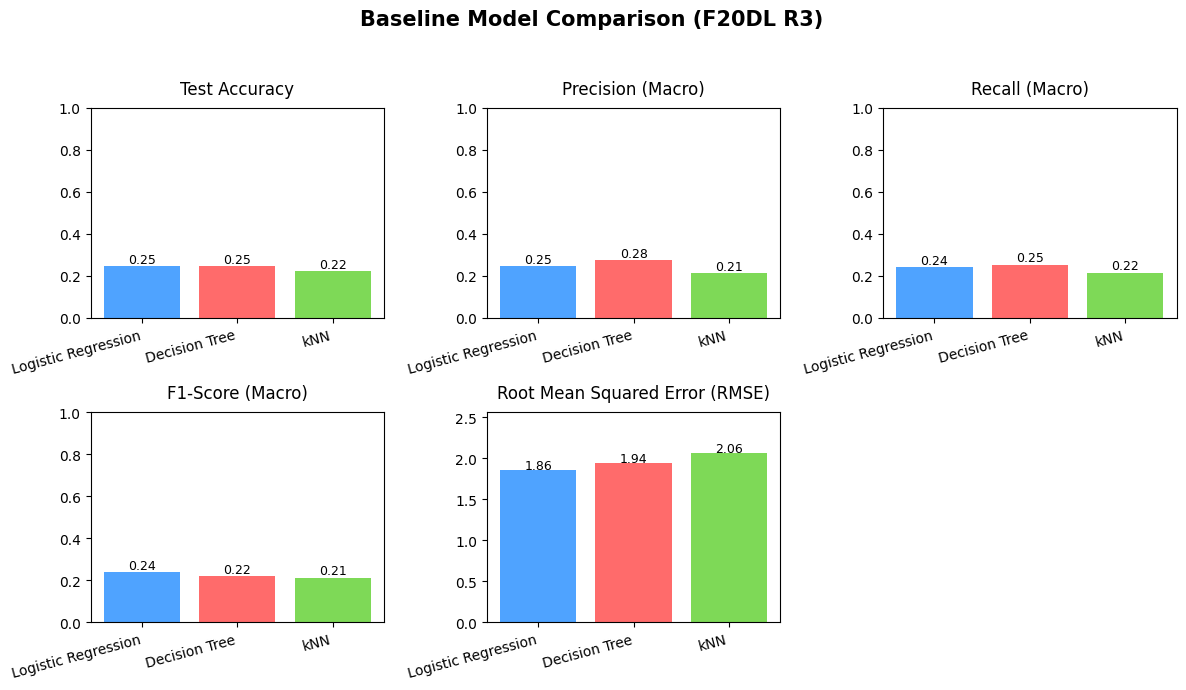

In [17]:
import matplotlib.pyplot as plt
import numpy as np

models = df["Model"]
colors = ["#4fa3ff", "#ff6b6b", "#7ed957"]
x = np.arange(len(models))

fig, axes = plt.subplots(2, 3, figsize=(12, 7))
fig.suptitle("Baseline Model Comparison (F20DL R3)", fontsize=15, fontweight="bold", y=0.98)

def annotate(ax, values, offset=0.015, fmt="{:.2f}"):
    for i, v in enumerate(values):
        ax.text(i, v + offset, fmt.format(v), ha='center', fontsize=9)

def label_axes(ax, title, ylim):
    ax.set_title(title, pad=10)
    ax.set_ylim(0, ylim)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=15, ha='right')

# Row 1
axes[0,0].bar(models, df["Accuracy"], color=colors); annotate(axes[0,0], df["Accuracy"]); label_axes(axes[0,0], "Test Accuracy", 1)
axes[0,1].bar(models, df["Precision"], color=colors); annotate(axes[0,1], df["Precision"]); label_axes(axes[0,1], "Precision (Macro)", 1)
axes[0,2].bar(models, df["Recall"], color=colors); annotate(axes[0,2], df["Recall"]); label_axes(axes[0,2], "Recall (Macro)", 1)

# Row 2
axes[1,0].bar(models, df["F1"], color=colors); annotate(axes[1,0], df["F1"]); label_axes(axes[1,0], "F1-Score (Macro)", 1)
axes[1,1].bar(models, df["RMSE"], color=colors); annotate(axes[1,1], df["RMSE"], fmt="{:.2f}"); label_axes(axes[1,1], "Root Mean Squared Error (RMSE)", max(df["RMSE"]) + 0.5)
axes[1,2].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.45, wspace=0.35)

plt.savefig("../results/figures/final_baseline_dashboard_rmse_only.png", bbox_inches="tight", dpi=300)
plt.show()